In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

## Evolution de la tempérture annuelle mondiale.

In [115]:
# Température moyennes (terres & océans)
df = pd.read_csv('sample_data/GlobalTemperatures.csv', sep=",")
df = df[['dt', 'LandAndOceanAverageTemperature', 'LandAndOceanAverageTemperatureUncertainty']]
df.drop(df[df.LandAndOceanAverageTemperature.isna()].index, inplace=True)
df['dt'] = pd.to_datetime(df.dt, format='%Y-%m-%d')
df = df.groupby(df.dt.dt.year).mean()
df = df.reset_index(drop=False)
df

<ipython-input-115-db3ba3fa148e>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby(df.dt.dt.year).mean()


,dt,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1850,14.867167,0.308167
1,1851,14.991833,0.312083
2,1852,15.006500,0.316417
3,1853,14.955167,0.283833
4,1854,14.991000,0.276417
...,...,...,...
161,2011,15.769500,0.059000
162,2012,15.802333,0.061500
163,2013,15.854417,0.064667
164,2014,15.913000,0.063167


<ipython-input-116-45d5d4f26007>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f"{val}°C" for val in plt.gca().get_yticks()])


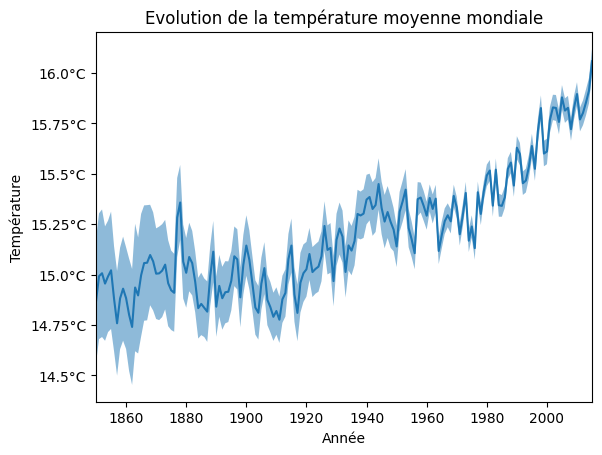

In [116]:
# Génération du lineplot
y = df['LandAndOceanAverageTemperature']
imprecision = df['LandAndOceanAverageTemperatureUncertainty']
sns.lineplot(data=df, x='dt', y=y)
plt.fill_between(df.dt, [y[i] - imprecision[i] for i in range(len(y))], [y[i] + imprecision[i] for i in range(len(y))], alpha=0.5)

plt.xlim(df.dt.min(),df.dt.max())
plt.title("Evolution de la température moyenne mondiale")
plt.xlabel("Année")
plt.ylabel("Température")
plt.gca().set_yticklabels([f"{val}°C" for val in plt.gca().get_yticks()])

plt.show()

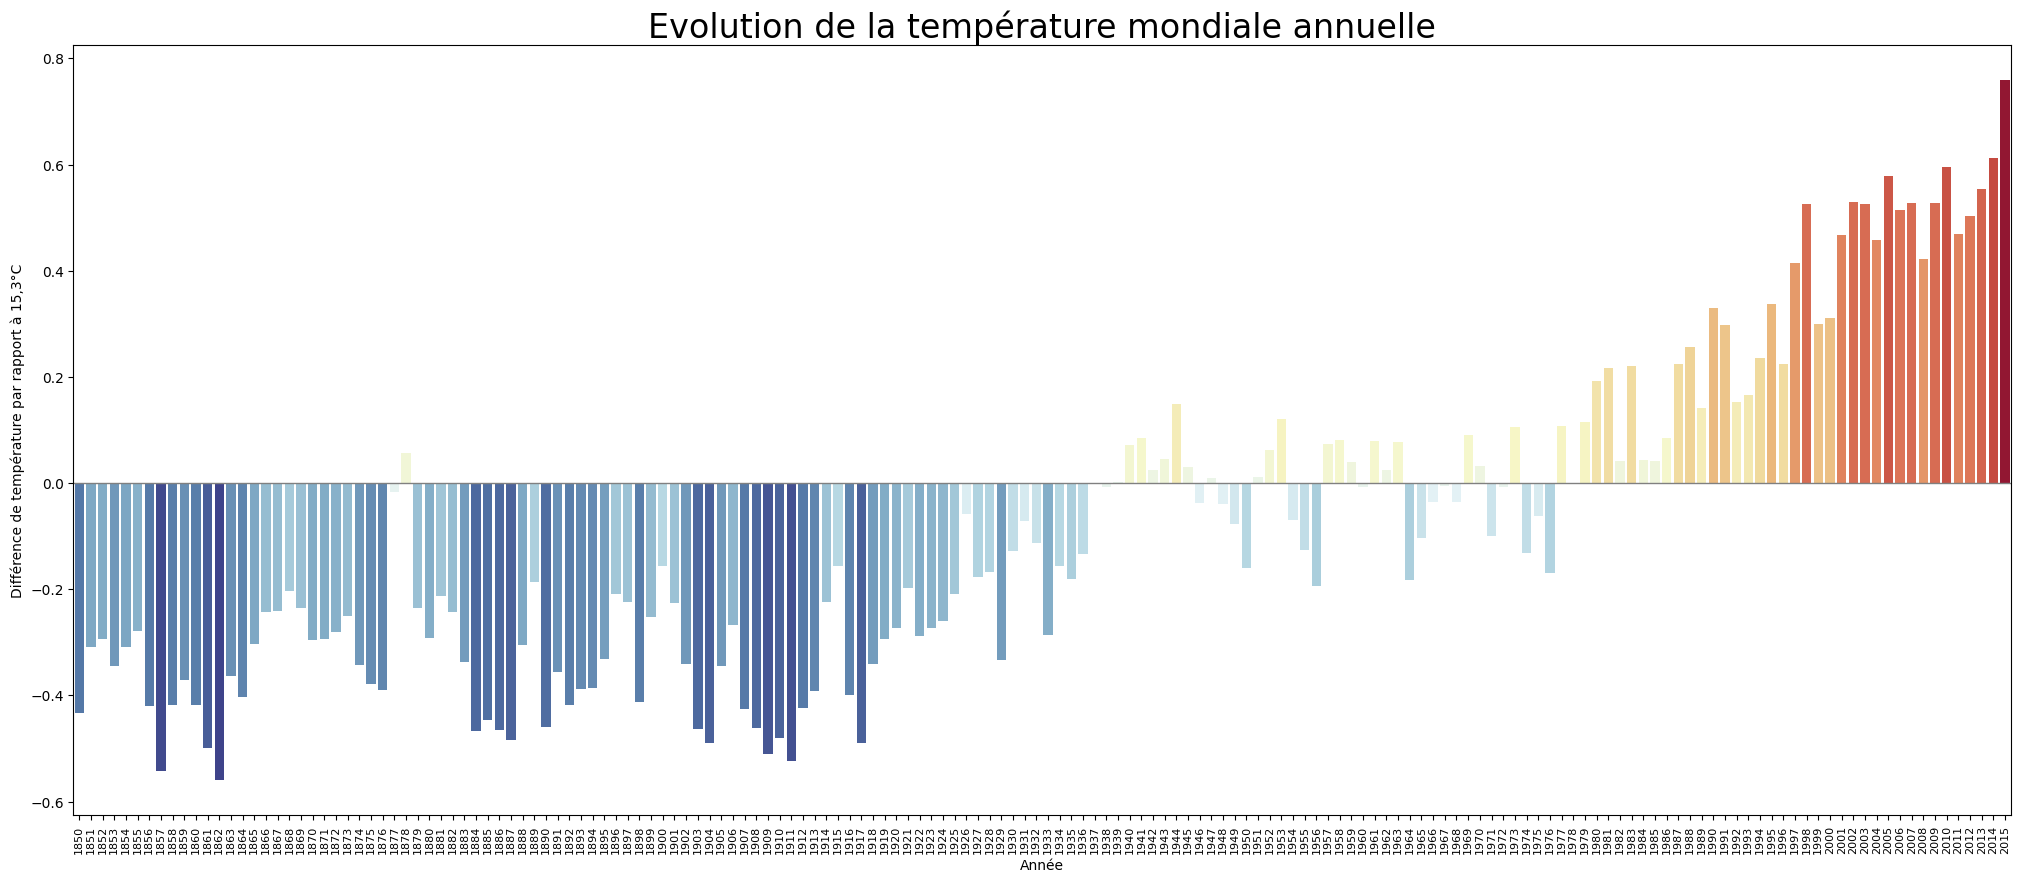

In [117]:
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)


df1 = df

# Graphique centré sur 15.3°C
df1['TemperatureCentree'] = df1['LandAndOceanAverageTemperature'] - 15.3

plt.figure(figsize=(25, 10))
plt.xticks(rotation=90, fontsize=8)

sns.barplot(x='dt', y='TemperatureCentree', data=df1, palette=colors_from_values(y, "RdYlBu_r"))

plt.axhline(y=0, color='grey', linewidth=1)

plt.title("Evolution de la température mondiale annuelle", size = 24)
plt.xlabel("Année")
plt.ylabel("Différence de température par rapport à 15,3°C")

plt.show()


<Axes: title={'center': 'Evolution des températures'}, xlabel='Mois', ylabel='Température (°C)'>

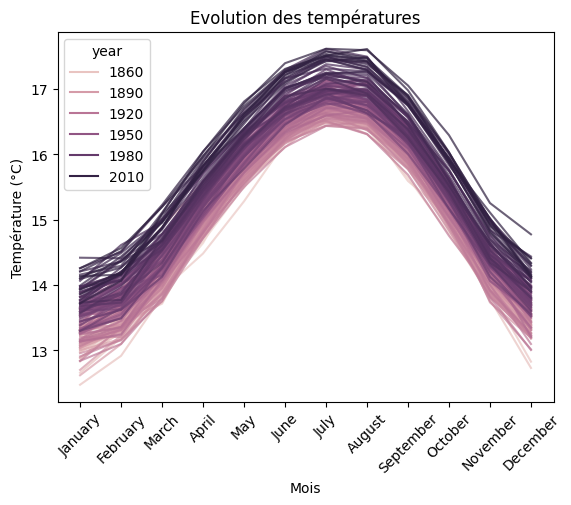

In [120]:
df2 = pd.read_csv('sample_data/GlobalTemperatures.csv', sep=",")
df2 = df2[['dt', 'LandAndOceanAverageTemperature']]
df2.drop(df2[df2.LandAndOceanAverageTemperature.isna()].index, inplace=True)
df2['dt'] = pd.to_datetime(df2.dt, format='%Y-%m-%d')
df2.insert(1,"year", df2.dt.dt.year)
df2['dt'] = df2.dt.dt.month.apply(lambda x: calendar.month_name[x])
df2.rename(columns={"dt": "month"}, inplace=True)
df2 = df2.reset_index(drop=True)
df2

plt.xticks(rotation=45)

plt.title("Evolution des températures")
plt.xlabel("Mois")
plt.ylabel("Température (°C)")

sns.lineplot(data=df2, x='month',
             y='LandAndOceanAverageTemperature',
             hue="year",
             alpha=0.7)